### Import packages

In [1]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

### Read the data

In [13]:
path = 'C:/Users/shant/intro to python/'
fname = 'sst.mnmean.nc'
mname = 'lsmask.nc'
ds = xr.open_dataset(path+fname)
ds





<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 476)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-07-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

### Load the land-sea mask data

In [14]:
masknc = xr.open_dataset(path+mname)
# strip the time dimension off the mask
seamask = masknc.variables['mask'][0].astype(bool)
masknc.close()
landmask = np.logical_not(seamask)
print(landmask.shape)

(180, 360)


### Make some initial plot with the data

In [6]:
sst = ds.variables['sst'][:]

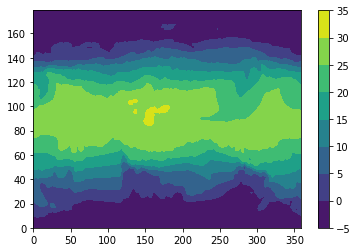

In [8]:
plt.contourf(sst[0]) #plot the 1st month of the data
plt.colorbar()

(476, 180, 360)

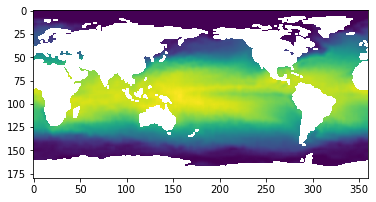

In [17]:
sst_array = np.ma.array(sst)
sst_array[:, landmask] = np.ma.masked
plt.imshow(sst_array[0])
sst_array.shape

### Plot with a map
We want a proper plot with coastline, lat, lon etc.

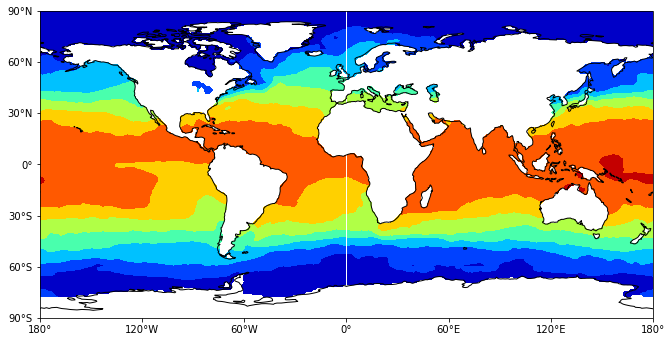

In [18]:
#make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=sst[0]
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], sst_array[0],
            transform = ccrs.PlateCarree(),cmap=plt.cm.jet)

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)